Here, we will be setting up the environment.
## Conditions: 
            1) A 2D grid where cell can occupy discrete position
            2) Each cell can move to one of neighbouring position

## Cell Proliferation Rules:
                    1) A cell duplicates into one of avialabel neighbouring position 
                    2) if there is no vaccancy no proliferation occurs(contact inhibition)

## Paramteres:
            1) Grid size= 50*50
            2) Initial cell count and placement
            3)Number of iteration(times steps)

## Visualtion: 
             We will display the grid showing cell proliferation over time

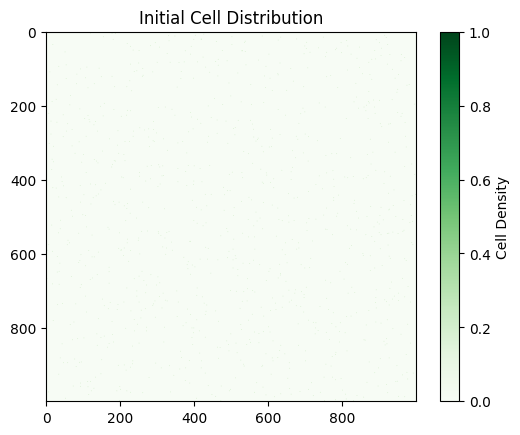

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

#parameters
grid_size=1000
intial_cells=1000
iterations=50

#initilizating the grid
grid = np.zeros((grid_size,grid_size),dtype=int)

#Randomly placing intial cell 
for  a in range(intial_cells):
    x,y = random.randint(0,grid_size-1),random.randint(0,grid_size-1)
    grid[x,y] = 1

#function to display the grid
def plot_grid(grid,title='Cell Proliferation'):
    plt.imshow(grid,cmap='Greens',origin='upper')
    plt.title(title)
    plt.colorbar(label="Cell Density")
    plt.show()
    
#Priting the grid
plot_grid(grid,"Initial Cell Distribution")

## Proliferation Rule 

## Simulating

# Simulate and visualize
for i in range(iterations):
    grid = proliferation(grid)
    if i % 10 == 0:  # Plot every 10 iterations
        plot_grid(grid, title=f"Iteration {i}")


## Adding Contact Inhibition

In [9]:
def proliferate_with_inhibition(grid):
    new_grid = grid.copy()
    grid_size = grid.shape[0]
    
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] == 1:  # If there's a cell
                # Check neighbors
                neighbors = [
                    (x-1, y), (x+1, y), (x, y-1), (x, y+1)
                ]
                random.shuffle(neighbors)  # Randomize neighbor selection
                free_neighbors = [
                    (nx, ny) for nx, ny in neighbors
                    if 0 <= nx < grid_size and 0 <= ny < grid_size and new_grid[nx, ny] == 0
                ]
                
                if free_neighbors:  # If there's at least one free neighbor
                    nx, ny = free_neighbors[0]  # Choose the first free neighbor
                    new_grid[nx, ny] = 1
    return new_grid


## Adding Migration

In [10]:
def migrate(grid, jump_size=1):
    new_grid = grid.copy()
    grid_size = grid.shape[0]
    
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] == 1:  # If there's a cell
                # Randomly choose a direction within jump_size
                dx, dy = random.randint(-jump_size, jump_size), random.randint(-jump_size, jump_size)
                nx, ny = x + dx, y + dy
                
                # Ensure within bounds and target position is free
                if 0 <= nx < grid_size and 0 <= ny < grid_size and new_grid[nx, ny] == 0:
                    new_grid[nx, ny] = 1
                    new_grid[x, y] = 0  # Clear the original position
    return new_grid


## Visual enhcnacements

In [11]:
def plot_grid(grid, title="Cell Proliferation", iteration=None, migrated_cells=None):
    """
    Enhanced visualization for cell proliferation.
    - Original cells: Green.
    - Newly proliferated cells: Yellow.
    - Migrated cells: Blue.
    - Crowded cells: Red.
    """
    color_grid = np.zeros(grid.shape, dtype=int)

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] == 1:
                color_grid[x, y] = 1  # Default: Green (original cells)

    # Highlight migrated cells (if any)
    if migrated_cells:
        for x, y in migrated_cells:
            color_grid[x, y] = 2  # Blue for migrated cells

    plt.figure(figsize=(6, 6))
    plt.imshow(color_grid, cmap="viridis", origin="upper")
    plt.title(f"{title} (Iteration {iteration})" if iteration is not None else title)
    plt.colorbar(label="Cell States")
    plt.tight_layout()
    plt.show()


## simulating migration and proliferation with visual enhancements

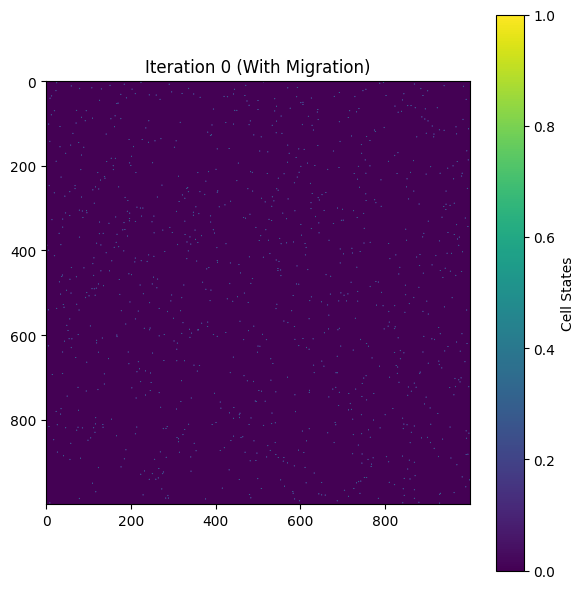

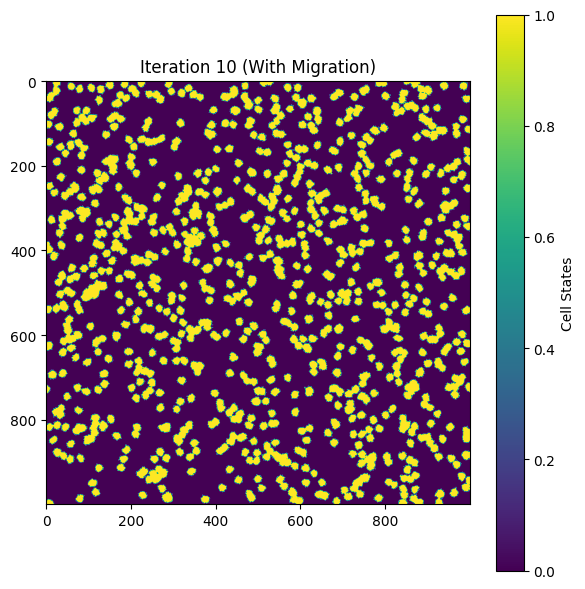

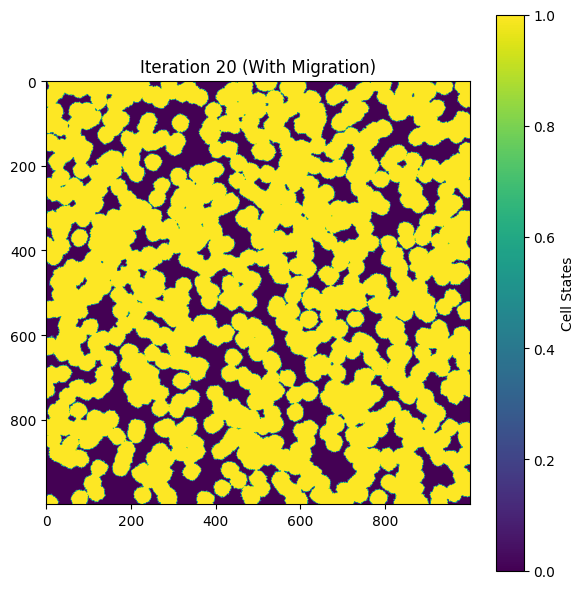

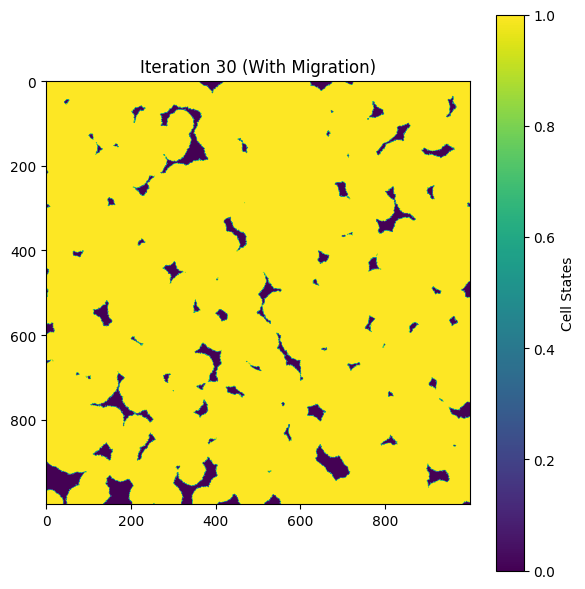

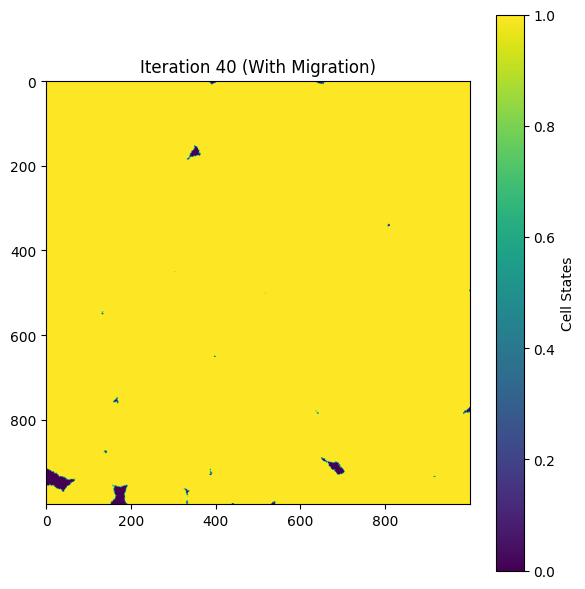

In [5]:
# Simulate with migration and proliferation
for i in range(50):
    grid = migrate(grid)  # Perform migration
    grid = proliferate_with_inhibition(grid)  # Perform proliferation

    if i % 10 == 0:  # Plot every 10 iterations
        plot_grid(grid, title=f"Iteration {i} (With Migration)")


## Animation Baby

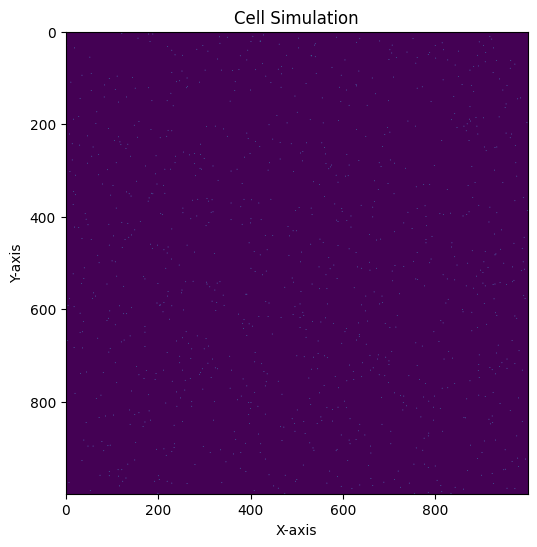

In [12]:
from matplotlib.animation import FuncAnimation
grids = []

def simulate_with_visuals(iterations):
    global grid
    grids.clear()  # Reset grids
    grids.append(grid.copy())  # Store initial state
    
    for _ in range(iterations):
        grid = migrate(grid)  # Perform migration
        grid = proliferate_with_inhibition(grid)  # Perform proliferation
        grids.append(grid.copy())  # Store grid after each iteration

simulate_with_visuals(iterations)

# Animation
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(grids[0], cmap="viridis", origin="upper")
ax.set_title("Cell Simulation")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

def update(frame):
    im.set_array(grids[frame])  # Update the image data
    ax.set_title(f"Iteration {frame}")



# Create animation
anim = FuncAnimation(fig, update, frames=len(grids), repeat=False)

# Show animation
plt.show()

anim.save('cell_simulation_proper.mp4', writer='ffmpeg')



